In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv("Ice_cream selling data.csv")
df.head(10)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [20]:
x_train , x_test , y_train , y_test = train_test_split( df['Temperature (°C)'].to_numpy(), df['Ice Cream Sales (units)'].to_numpy() , random_state=42 , test_size=.2)

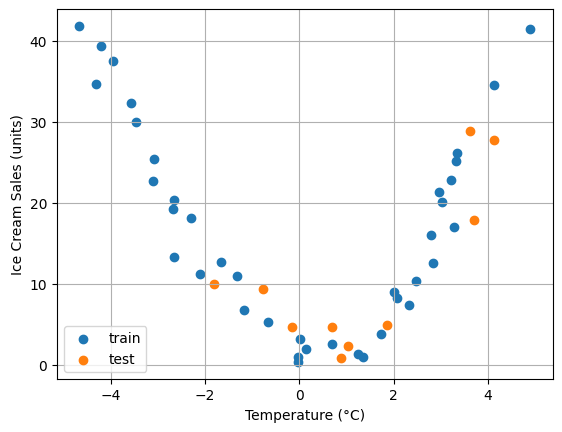

In [21]:
plt.scatter(x_train , y_train , label = "train")
plt.scatter(x_test , y_test , label = "test")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.grid()

- Model sellection

In [14]:
linear_model = linear_model.LinearRegression()
poly_model = PolynomialFeatures(degree=3)

- Data transformation : linear to polynomial

In [23]:
x_train_trans = poly_model.fit_transform(x_train.reshape(-1, 1))
x_test_trans = poly_model.transform(x_test.reshape(-1, 1))
x_train_trans[0]

array([ 1.        , -2.11186969,  4.45999359, -9.41892528])

In [24]:
linear_model.fit(x_train_trans , y_train)
x_pred = linear_model.predict(x_test_trans)
print(f'original value : {y_test[0]}')
print(f'predicted value : {x_pred[0]}')
r2_score( y_test , x_pred)

original value : 10.012867848328883
predicted value : 11.261737824774377


0.8405107685716915

[]

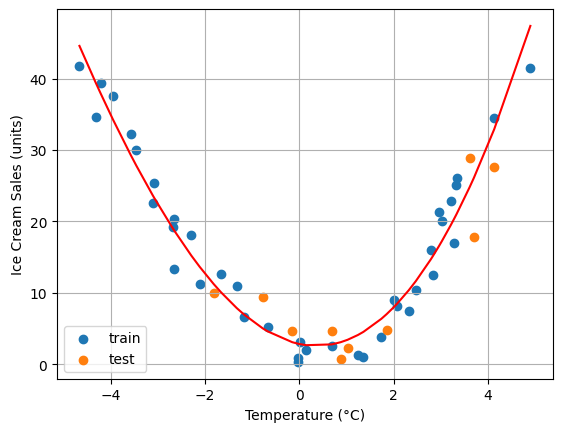

In [42]:
plt.scatter(x_train , y_train , label = "train")
plt.scatter(x_test , y_test , label = "test")
plt.plot( df['Temperature (°C)'].to_numpy() , linear_model.predict(poly_model.fit_transform(df['Temperature (°C)'].to_numpy().reshape(-1, 1))) , c='r')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.grid()
plt.plot()

[]

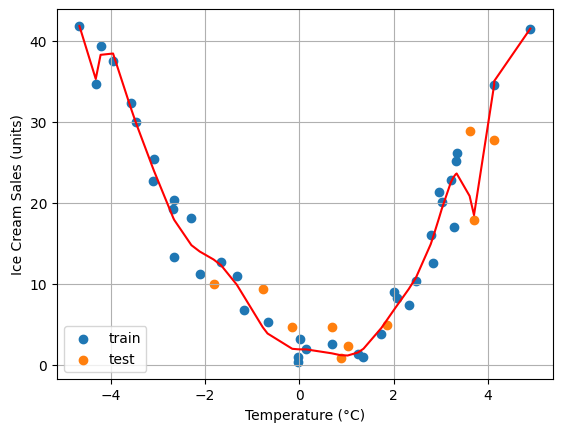

In [53]:
poly_model = PolynomialFeatures(degree=17)
linear_model.fit(poly_model.fit_transform(x_train.reshape(-1, 1)) , y_train)
plt.scatter(x_train , y_train , label = "train")
plt.scatter(x_test , y_test , label = "test")
plt.plot( df['Temperature (°C)'].to_numpy() , linear_model.predict(poly_model.fit_transform(df['Temperature (°C)'].to_numpy().reshape(-1, 1))) , c='r')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.grid()
plt.plot()

[]

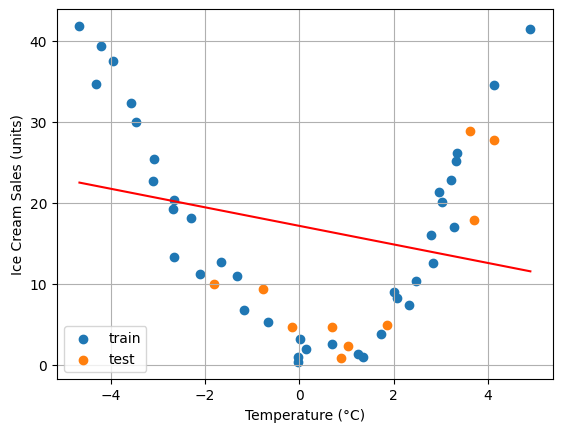

In [56]:
poly_model = PolynomialFeatures(degree=1)
linear_model.fit(poly_model.fit_transform(x_train.reshape(-1, 1)) , y_train)
plt.scatter(x_train , y_train , label = "train")
plt.scatter(x_test , y_test , label = "test")
plt.plot( df['Temperature (°C)'].to_numpy() , linear_model.predict(poly_model.fit_transform(df['Temperature (°C)'].to_numpy().reshape(-1, 1))) , c='r')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.grid()
plt.plot()